# Lab #7

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio
import pickle as pkl

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,6)


In [2]:
qcd_before = pkl.load( open( "gcd.pkl", "rb" ) )
higgs_before = pkl.load( open( "higgs.pkl", "rb"))
qcd = pd.DataFrame(qcd_before, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
higgs = pd.DataFrame(higgs_before, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

## Part 1

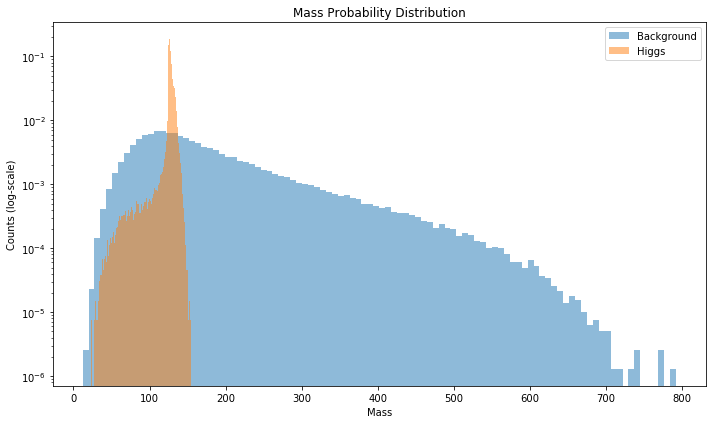

In [3]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (10, 6))
ax1.hist(qcd['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); 
ax1.set_ylabel('Counts (log-scale)'); ax1.set_xlabel('Mass')
fig.tight_layout(); ax1.legend()

Here, without any cuts whatsoever, there exists a background that should be measured around 2000 times in a given data collection window and in the same data collection window there exist 50 actual higgs boson signal measurements. I will create a poisson distribution of the background with 2000 as the average rate, and determine the significance of measuring 50 higgs particles during a given run. 

Probability a signal will be falsely assumed as background: 1.0 || sigma value for this percentage: -inf


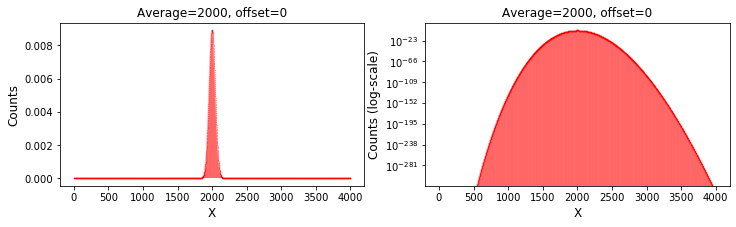

In [4]:
mu = 2000; offset = 0;
d = stats.poisson.rvs(mu, offset, size = 100000)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,3))
ax.set_title(f'Average={mu}, offset={offset}')
ax.tick_params(labelsize = 10)
x = np.linspace(0, 2*mu,2*mu+1)
ax.plot(x,stats.poisson.pmf(x, mu, offset), 'r.', alpha = .5, ms = .5)
ax.vlines(x, 0, stats.poisson.pmf(x, mu, offset), colors='r', lw=.1, alpha=0.5)
ax2.set_yscale('log')
ax2.set_title(f'Average={mu}, offset={offset}')
ax2.tick_params(labelsize = 10)
#ax2.set_xlim([mu,mu+5*offset])
ax2.plot(x,stats.poisson.pmf(x, mu, offset), 'r.' ,alpha = .5, ms = .5)
ax2.vlines(x, 0, stats.poisson.pmf(x, mu, offset), colors='r', lw=.1, alpha=0.5)
ax2.set_ylabel("Counts (log-scale)", fontsize=12); ax.set_ylabel("Counts", fontsize = 12)
ax2.set_xlabel("X", fontsize=12); ax.set_xlabel("X", fontsize = 12)
base = np.linspace(0, 50, 51)
ax.fill_between(base, stats.poisson.pmf(base, mu, offset), color = 'b', linewidth = 1, alpha = .4)
ax2.fill_between(base, stats.poisson.pmf(base, mu, offset), color = 'b', linewidth = 1, alpha = .4)
prob = 1 - stats.poisson.cdf(50, mu, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

The significance of this detection is incredibly small, so small that my computer doesn't recognize the higgs data statistically apart from the background. There will need to be some significant shaving from the background so that the sensitivity to higgs boson detection is increased by a large factor. In fact, in order to have a 5$\sigma$ detection from this data, the background distribution would have to change from 2000 all the way to 22. By taking primarily mass cuts, as well as other cuts from the data, more and more background can be removed which will increase the sensitivity to higgs measurement.

## Part 2

During Lab 4 I started doing a little digging and I found that these cuts would probably serve well to remove a lot of background and not much of the higgs data. This is the data that will be kept, not cut out.

Kept after cuts so far: 
-	Eta: 	-2 < x < 1.9 
-	‘d2’: 	x < ~50 
-	‘ee2’: 	x < ~.08 
-	‘ee3’: 	x < ~.001
-	Mass: 	x < ~160
-	R: 		x < ~.9

I will make the mass cut first. 

In [5]:
qcd_new = qcd.query(f'mass < 160')
higgs_new = higgs.query(f'mass < 160')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.44236  ||  Percent cut from real higgs data: 0.0


This specific mass cut removes 44.2\%  of the background from the set and does not remove any of the real data. Below is the new mass distribution histogram. 

Probability a signal will be falsely assumed as background: 1.0 || sigma value for this percentage: -inf


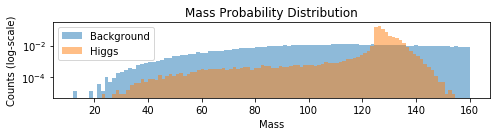

In [6]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Didn't even make a dent, my significance is still nothing. My new idea is that I am going to have to chip away at the mass until it reaches the mass values in which the Higgs boson data is more likely to occur than the background. I will do this systematically to show how it increases significance. 

In [7]:
qcd_new = qcd.query(f'60 < mass < 150')
higgs_new = higgs.query(f'60 < mass < 150')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.5170699999999999  ||  Percent cut from real higgs data: 0.003249999999999975


Probability a signal will be falsely assumed as background: 1.0 || sigma value for this percentage: -inf


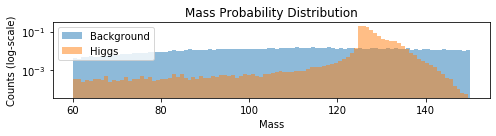

In [8]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Bigger cuts are going to be needed. 

In [9]:
qcd_new = qcd.query(f'100 < mass < 150')
higgs_new = higgs.query(f'100 < mass < 150')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.68689  ||  Percent cut from real higgs data: 0.019480000000000053


Probability a signal will be falsely assumed as background: 1.0 || sigma value for this percentage: -inf


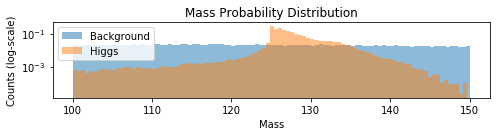

In [10]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

In [11]:
qcd_new = qcd.query(f'120 < mass < 140')
higgs_new = higgs.query(f'120 < mass < 140')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.87485  ||  Percent cut from real higgs data: 0.04781000000000002


Probability a signal will be falsely assumed as background: 1.0 || sigma value for this percentage: -inf


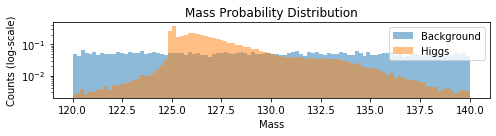

In [12]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

At this point I have cut out 87.5% of the Background signal, and only 4.8% of the Higgs Data. There is still no noticable significance to the measurement. I have to move in further. 

In [13]:
qcd_new = qcd.query(f'124 < mass < 130')
higgs_new = higgs.query(f'124 < mass < 130')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.96188  ||  Percent cut from real higgs data: 0.26207


Probability a signal will be falsely assumed as background: 0.999999778092791 || sigma value for this percentage: -5.0491


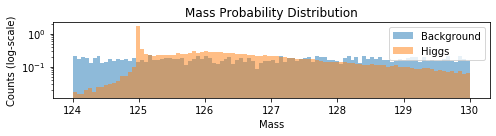

In [14]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

This got us on the board!!! Now I have to continue to move in to get the sigma value to be a positive number. A positive sigma value means that I will see significantly more higgs particle signals than my expected background. 

In [15]:
qcd_new = qcd.query(f'124.9 < mass < 127.5')
higgs_new = higgs.query(f'124.9 < mass < 127.5')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.98393  ||  Percent cut from real higgs data: 0.48549


Probability a signal will be falsely assumed as background: 0.8819591181152432 || sigma value for this percentage: -1.1848


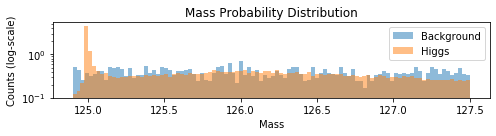

In [16]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

As the distribution becomes more and more defined in this location, I am realizing I have to move in even further. I have to narrow around the spike at 125. Here I have already cut out 98.4% of the background and 48.5% of the simulated Higgs data. 

In [17]:
qcd_new = qcd.query(f'124.97 < mass < 125.2')
higgs_new = higgs.query(f'124.97 < mass < 125.2')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.99853  ||  Percent cut from real higgs data: 0.8886499999999999


Probability a signal will be falsely assumed as background: 0.07799017471289493 || sigma value for this percentage: 1.4187


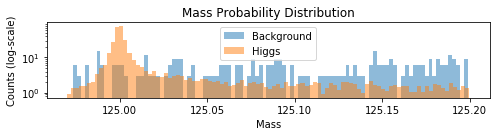

In [18]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Now I have reached a positive sigma value! This means that the number of higgs observations are likely to outnumber the number of background signals. I need to narrow the data even further to get closer to 5$\sigma$

In [19]:
qcd_new = qcd.query(f'124.99 < mass < 125.02')
higgs_new = higgs.query(f'124.99 < mass < 125.02')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.99984  ||  Percent cut from real higgs data: 0.9292


Probability a signal will be falsely assumed as background: 0.0003386984234166057 || sigma value for this percentage: 3.3986


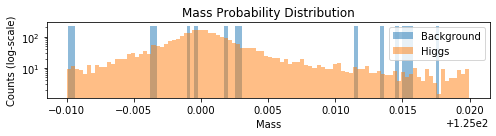

In [20]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

One last cut and I should be there. 

In [21]:
qcd_new = qcd.query(f'124.991 < mass < 125.0115')
higgs_new = higgs.query(f'124.991 < mass < 125.0115')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.99993  ||  Percent cut from real higgs data: 0.93393


Probability a signal will be falsely assumed as background: 1.4314438797402573e-05 || sigma value for this percentage: 4.1841


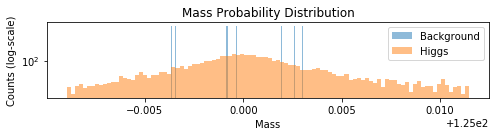

In [22]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Okay, this is an extremely narrow mass expectancy for the observations that will provide higgs data with large significance. I have successfully cut out 99.993% of the background and 93.393% of the simulated Higgs data which provides a significance of $4.2\sigma$

## Part 3

During Lab 4 I started doing a little digging and I found that these cuts would probably serve well to remove a lot of background and not much of the higgs data. This is the data that will be kept, not cut out.

Kept after cuts so far: 
-	Eta: 	-2 < x < 1.9 
-	‘d2’: 	x < ~50 
-	‘ee2’: 	x < ~.08 
-	‘ee3’: 	x < ~.001
-	Mass: 	x < ~160
-	R: 		x < ~.9


A lot of these cuts appear not to be necessary after making massive mass cuts, I will explore this next. 

Text(0.5, 0, 'KtDeltaR')

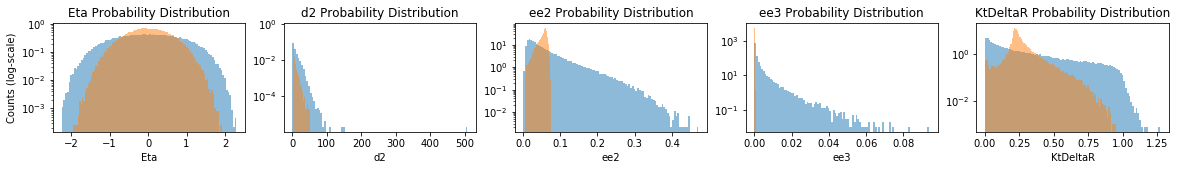

In [23]:
bins=100; a = .5
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 2))
ax1.hist(qcd['eta'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs['eta'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax2.hist(qcd['d2'], bins, alpha = a, density = True, label = 'Background'); ax2.hist(higgs['d2'], bins, alpha = a, density = True, label = 'Higgs'); ax2.set_yscale('log')
ax3.hist(qcd['ee2'], bins, alpha = a, density = True, label = 'Background'); ax3.hist(higgs['ee2'], bins, alpha = a, density = True, label = 'Higgs'); ax3.set_yscale('log')
ax4.hist(qcd['ee3'], bins, alpha = a, density = True, label = 'Background'); ax4.hist(higgs['ee3'], bins, alpha = a, density = True, label = 'Higgs'); ax4.set_yscale('log')
ax5.hist(qcd['KtDeltaR'], bins, alpha = a, density = True, label = 'Background'); ax5.hist(higgs['KtDeltaR'], bins, alpha = a, density = True, label = 'Higgs'); ax5.set_yscale('log')
ax1.set_title('Eta Probability Distribution');
ax2.set_title('d2 Probability Distribution');
ax3.set_title('ee2 Probability Distribution');
ax4.set_title('ee3 Probability Distribution');
ax5.set_title('KtDeltaR Probability Distribution');
ax1.set_xlabel('Eta'); ax1.set_ylabel('Counts (log-scale)')
ax2.set_xlabel('d2')
ax3.set_xlabel('ee2')
ax4.set_xlabel('ee3')
ax5.set_xlabel('KtDeltaR')

Text(0.5, 0, 'KtDeltaR')

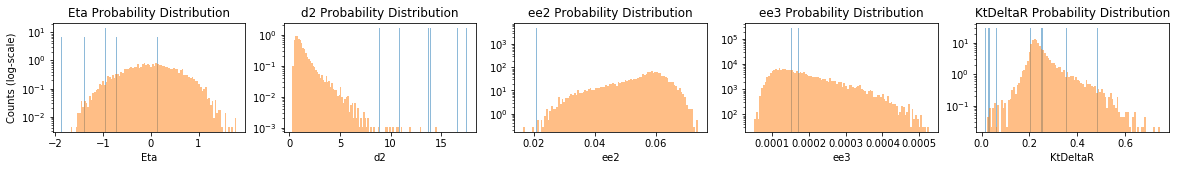

In [24]:
bins=100; a = .5
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 2))
ax1.hist(qcd_new['eta'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['eta'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax2.hist(qcd_new['d2'], bins, alpha = a, density = True, label = 'Background'); ax2.hist(higgs_new['d2'], bins, alpha = a, density = True, label = 'Higgs'); ax2.set_yscale('log')
ax3.hist(qcd_new['ee2'], bins, alpha = a, density = True, label = 'Background'); ax3.hist(higgs_new['ee2'], bins, alpha = a, density = True, label = 'Higgs'); ax3.set_yscale('log')
ax4.hist(qcd_new['ee3'], bins, alpha = a, density = True, label = 'Background'); ax4.hist(higgs_new['ee3'], bins, alpha = a, density = True, label = 'Higgs'); ax4.set_yscale('log')
ax5.hist(qcd_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Background'); ax5.hist(higgs_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Higgs'); ax5.set_yscale('log')
ax1.set_title('Eta Probability Distribution');
ax2.set_title('d2 Probability Distribution');
ax3.set_title('ee2 Probability Distribution');
ax4.set_title('ee3 Probability Distribution');
ax5.set_title('KtDeltaR Probability Distribution');
ax1.set_xlabel('Eta'); ax1.set_ylabel('Counts (log-scale)')
ax2.set_xlabel('d2')
ax3.set_xlabel('ee2')
ax4.set_xlabel('ee3')
ax5.set_xlabel('KtDeltaR') 

## Part 4

The next feature I would decide to cut out would be from 'd2' and I would make the cut at d2 > 8. Let's see how this affects the sensitivity. 

In [25]:
qcd_new = qcd.query(f'124.991 < mass < 125.0115 and d2 < 8.8')
higgs_new = higgs.query(f'124.991 < mass < 125.0115 and d2 < 8.8')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 1.0  ||  Percent cut from real higgs data: 0.93403


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Probability a signal will be falsely assumed as background: 0.0 || sigma value for this percentage: inf


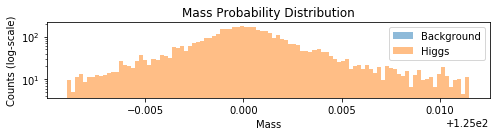

In [26]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

I have officially removed all of the background from the set and kept 6.597% of the simulated higgs data, this is as significant of a result as I am going to be able to achieve, but it may take a very long time to get enough results to see this into fruition. 

Next I will try making cuts to 'ee2' instead of 'd2' to see if it is more effective. 

In [27]:
qcd_new = qcd.query(f'124.991 < mass < 125.0115 and ee2 > .015')
higgs_new = higgs.query(f'124.991 < mass < 125.0115 and ee2 > .015')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.99993  ||  Percent cut from real higgs data: 0.93393


Probability a signal will be falsely assumed as background: 1.4314438797402573e-05 || sigma value for this percentage: 4.1841


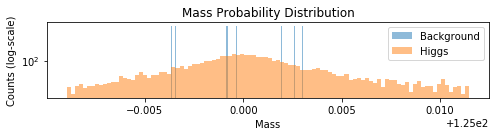

In [28]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Not as effective as making cuts from 'd2' so I will continue on with only mass cuts and 'd2' cuts.
__________
Now I've nailed down my selection. Here is the final cuts I have performed that provide the maximum significance while still keeping some background statistics. 

In [98]:
qcd_new = qcd.query(f'124.975 < mass < 125.028 and d2 < 8.5')
higgs_new = higgs.query(f'124.975 < mass < 125.028 and d2 < 8.5')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')

 Percent cut from background: 0.99995  ||  Percent cut from real higgs data: 0.92276


Probability a signal will be falsely assumed as background: 3.846833925291726e-06 || sigma value for this percentage: 4.4735


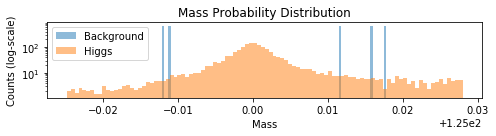

In [99]:
bins = 100; a = .5
fig, (ax1) = plt.subplots(1, 1, figsize = (7, 2))
ax1.hist(qcd_new['mass'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['mass'], bins, alpha = a, density = True, label = 'Higgs'); ax1.set_yscale('log')
ax1.set_title('Mass Probability Distribution'); ax1.set_xlabel('Mass')
ax1.set_ylabel('Counts (log-scale)'); 
fig.tight_layout(); ax1.legend()
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

But you did not achieve 5 sigma detection, so did you really get all of it?? I am just curious as you only get a 4.4735 sigma detection rate. I would explain why you 'nailed' it here by defining why maximum significance is. 

## Part 5 (bonus)
I will plot the correlation between mass and d2 to see if there is a curve I can follow to most effectively make cuts from the data. 

In [ ]:
qcd_new = qcd.query(f'124.991 < mass < 125.0115 and d2 < 8.8')
higgs_new = higgs.query(f'124.991 < mass < 125.0115 and d2 < 8.8')

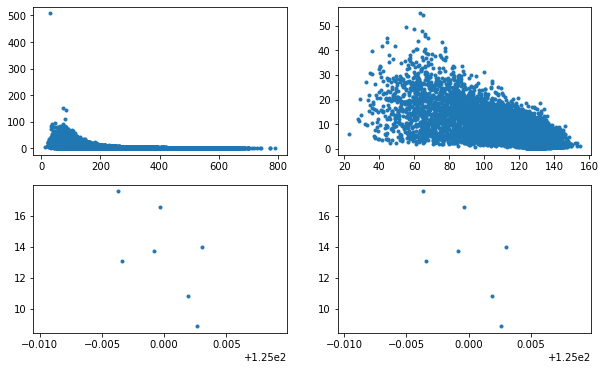

In [54]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (10, 6))
ax1.scatter(qcd['mass'], qcd['d2'], marker = '.'); ax2.scatter(higgs['mass'], higgs['d2'], marker = '.'); 
ax3.scatter(qcd_new['mass'], qcd_new['d2'], marker = '.'); ax4.scatter(higgs_new['mass'], higgs_new['d2'], marker = '.'); 
#ax1.set_xlim(0,200); ax1.set_ylim(0,200)

(0, 5)

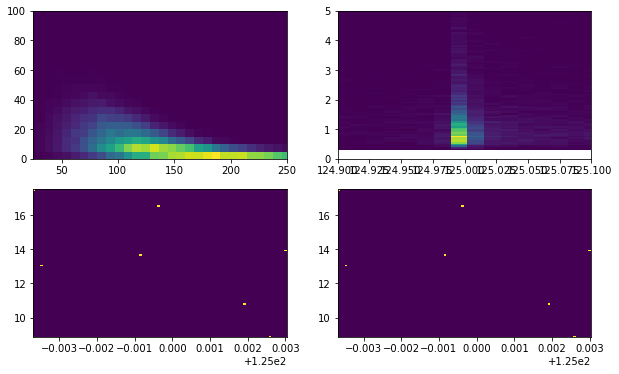

In [59]:
bins=100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (10, 6))
ax1.hist2d(qcd['mass'], qcd['d2'], bins); ax2.hist2d(higgs['mass'], higgs['d2'], (10000,1000)); 
ax3.hist2d(qcd_new['mass'], qcd_new['d2'], bins); ax4.hist2d(higgs_new['mass'], higgs_new['d2'], bins); 
ax1.set_xlim(25,250); ax1.set_ylim(0,100)
ax2.set_xlim(124.9,125.1); ax2.set_ylim(0,5)

There is a clear area of interest in the 2 dimensional plots, but I believe that my rectangular cuts are satsifactory for this lab and that trying to model a curve to find the best fit for the correlation between mass and d2 is best left for a computer program. 

# Lab 8)
Now I am going to look at the significance of the high and low lumi data sets.

Maybe give a brief intro to what these datasets are

In [100]:
highlumi = pd.read_hdf('highlumi.h5')
lowlumi = pd.read_hdf('lowlumi.h5')

In [103]:
qcd_new = qcd.query(f'124.975 < mass < 125.028 and d2 < 8.5')
higgs_new = higgs.query(f'124.975 < mass < 125.028 and d2 < 8.5')
highlumi_new = highlumi.query(f'124.975 < mass < 125.028 and d2 < 8.5')
lowlumi_new = lowlumi.query(f'124.975 < mass < 125.028 and d2 < 8.5')
bkgd_percent = len(qcd_new)/len(qcd); higgs_percent = len(higgs_new)/len(higgs); lowlumi_percent = len(lowlumi_new)/len(lowlumi); highlumi_percent = len(highlumi_new)/len(highlumi)
print(f' Percent cut from background: {1 - bkgd_percent}  ||  Percent cut from real higgs data: {1 - higgs_percent}')
print(f' Percent cut from High Luminosity data: {1 - highlumi_percent}  ||  Percent cut from Low Luminosity data: {1 - lowlumi_percent}')

 Percent cut from background: 0.99995  ||  Percent cut from real higgs data: 0.92276
 Percent cut from High Luminosity data: 0.9987702902115101  ||  Percent cut from Low Luminosity data: 1.0


Just looking at the above numbers it is clear that all of the low luminosity data was removed due to the cuts. This makes it likely that there was no higgs particles to be observed. 

#### High Luminosity

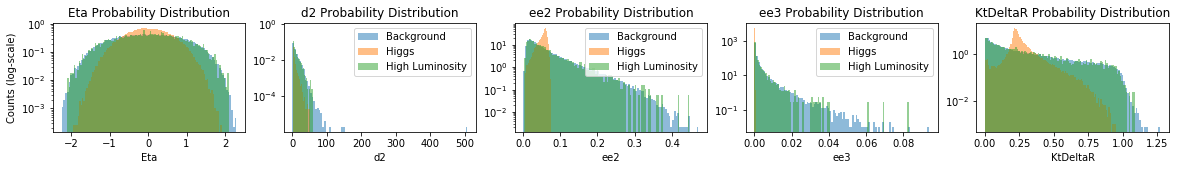

In [109]:
bins=100; a = .5
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 2))
ax1.hist(qcd['eta'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs['eta'], bins, alpha = a, density = True, label = 'Higgs'); ax1.hist(highlumi['eta'], bins, alpha = a, density = True, label = 'High Luminosity'); ax1.set_yscale('log')
ax2.hist(qcd['d2'], bins, alpha = a, density = True, label = 'Background'); ax2.hist(higgs['d2'], bins, alpha = a, density = True, label = 'Higgs'); ax2.hist(highlumi['d2'], bins, alpha = a, density = True, label = 'High Luminosity'); ax2.set_yscale('log')
ax3.hist(qcd['ee2'], bins, alpha = a, density = True, label = 'Background'); ax3.hist(higgs['ee2'], bins, alpha = a, density = True, label = 'Higgs'); ax3.hist(highlumi['ee2'], bins, alpha = a, density = True, label = 'High Luminosity'); ax3.set_yscale('log')
ax4.hist(qcd['ee3'], bins, alpha = a, density = True, label = 'Background'); ax4.hist(higgs['ee3'], bins, alpha = a, density = True, label = 'Higgs'); ax4.hist(highlumi['ee3'], bins, alpha = a, density = True, label = 'High Luminosity'); ax4.set_yscale('log')
ax5.hist(qcd['KtDeltaR'], bins, alpha = a, density = True, label = 'Background'); ax5.hist(higgs['KtDeltaR'], bins, alpha = a, density = True, label = 'Higgs');ax5.hist(highlumi['KtDeltaR'], bins, alpha = a, density = True, label = 'High Luminosity');  ax5.set_yscale('log')
ax1.set_title('Eta Probability Distribution');
ax2.set_title('d2 Probability Distribution');
ax3.set_title('ee2 Probability Distribution');
ax4.set_title('ee3 Probability Distribution');
ax5.set_title('KtDeltaR Probability Distribution');
ax1.set_xlabel('Eta'); ax1.set_ylabel('Counts (log-scale)')
ax2.set_xlabel('d2')
ax3.set_xlabel('ee2')
ax4.set_xlabel('ee3')
ax5.set_xlabel('KtDeltaR')
ax2.legend(); ax3.legend(); ax4.legend(); 

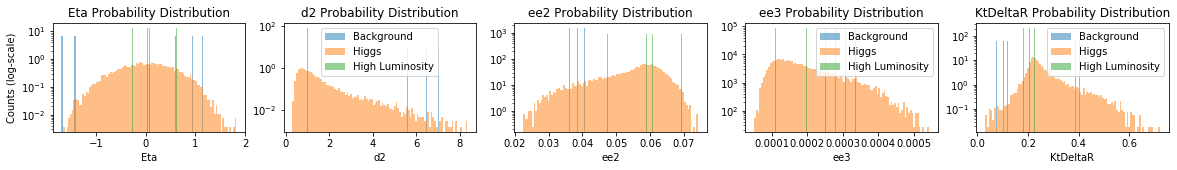

In [112]:
bins=100; a = .5
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 2))
ax1.hist(qcd_new['eta'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['eta'], bins, alpha = a, density = True, label = 'Higgs'); ax1.hist(highlumi_new['eta'], bins, alpha = a, density = True, label = 'High Luminosity'); ax1.set_yscale('log')
ax2.hist(qcd_new['d2'], bins, alpha = a, density = True, label = 'Background'); ax2.hist(higgs_new['d2'], bins, alpha = a, density = True, label = 'Higgs'); ax2.hist(highlumi_new['d2'], bins, alpha = a, density = True, label = 'High Luminosity'); ax2.set_yscale('log')
ax3.hist(qcd_new['ee2'], bins, alpha = a, density = True, label = 'Background'); ax3.hist(higgs_new['ee2'], bins, alpha = a, density = True, label = 'Higgs'); ax3.hist(highlumi_new['ee2'], bins, alpha = a, density = True, label = 'High Luminosity'); ax3.set_yscale('log')
ax4.hist(qcd_new['ee3'], bins, alpha = a, density = True, label = 'Background'); ax4.hist(higgs_new['ee3'], bins, alpha = a, density = True, label = 'Higgs'); ax4.hist(highlumi_new['ee3'], bins, alpha = a, density = True, label = 'High Luminosity'); ax4.set_yscale('log')
ax5.hist(qcd_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Background'); ax5.hist(higgs_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Higgs');ax5.hist(highlumi_new['KtDeltaR'], bins, alpha = a, density = True, label = 'High Luminosity');  ax5.set_yscale('log')
ax1.set_title('Eta Probability Distribution');
ax2.set_title('d2 Probability Distribution');
ax3.set_title('ee2 Probability Distribution');
ax4.set_title('ee3 Probability Distribution');
ax5.set_title('KtDeltaR Probability Distribution');
ax1.set_xlabel('Eta'); ax1.set_ylabel('Counts (log-scale)')
ax2.set_xlabel('d2')
ax3.set_xlabel('ee2')
ax4.set_xlabel('ee3')
ax5.set_xlabel('KtDeltaR')
ax2.legend(); ax5.legend(); ax4.legend();

In [116]:
prob = 1 - stats.poisson.cdf(len(highlumi_new), 2000*bkgd_percent)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Probability a signal will be falsely assumed as background: 1.2748987421318247e-09 || sigma value for this percentage: 5.9582


The given mass and 'd2' cuts have given a significance of the high luminosity data of 5.958 $\sigma$. This is assuming that the High Luminosity data is already normalized to a single set of data collection. 


#### Low Luminosity

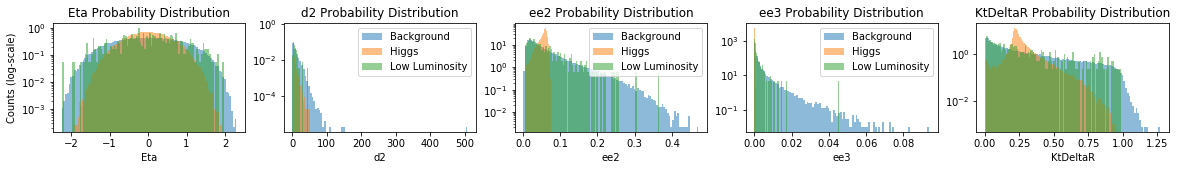

In [114]:
bins=100; a = .5
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 2))
ax1.hist(qcd['eta'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs['eta'], bins, alpha = a, density = True, label = 'Higgs'); ax1.hist(lowlumi['eta'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax1.set_yscale('log')
ax2.hist(qcd['d2'], bins, alpha = a, density = True, label = 'Background'); ax2.hist(higgs['d2'], bins, alpha = a, density = True, label = 'Higgs'); ax2.hist(lowlumi['d2'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax2.set_yscale('log')
ax3.hist(qcd['ee2'], bins, alpha = a, density = True, label = 'Background'); ax3.hist(higgs['ee2'], bins, alpha = a, density = True, label = 'Higgs'); ax3.hist(lowlumi['ee2'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax3.set_yscale('log')
ax4.hist(qcd['ee3'], bins, alpha = a, density = True, label = 'Background'); ax4.hist(higgs['ee3'], bins, alpha = a, density = True, label = 'Higgs'); ax4.hist(lowlumi['ee3'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax4.set_yscale('log')
ax5.hist(qcd['KtDeltaR'], bins, alpha = a, density = True, label = 'Background'); ax5.hist(higgs['KtDeltaR'], bins, alpha = a, density = True, label = 'Higgs');ax5.hist(lowlumi['KtDeltaR'], bins, alpha = a, density = True, label = 'Low Luminosity');  ax5.set_yscale('log')
ax1.set_title('Eta Probability Distribution');
ax2.set_title('d2 Probability Distribution');
ax3.set_title('ee2 Probability Distribution');
ax4.set_title('ee3 Probability Distribution');
ax5.set_title('KtDeltaR Probability Distribution');
ax1.set_xlabel('Eta'); ax1.set_ylabel('Counts (log-scale)')
ax2.set_xlabel('d2')
ax3.set_xlabel('ee2')
ax4.set_xlabel('ee3')
ax5.set_xlabel('KtDeltaR')
ax2.legend(); ax3.legend(); ax4.legend(); 

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


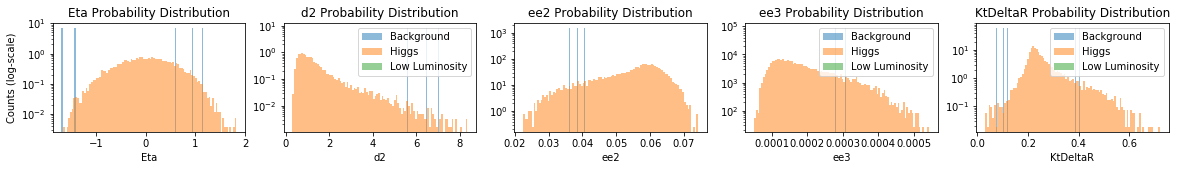

In [115]:
bins=100; a = .5
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 2))
ax1.hist(qcd_new['eta'], bins, alpha = a, density = True, label = 'Background'); ax1.hist(higgs_new['eta'], bins, alpha = a, density = True, label = 'Higgs'); ax1.hist(lowlumi_new['eta'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax1.set_yscale('log')
ax2.hist(qcd_new['d2'], bins, alpha = a, density = True, label = 'Background'); ax2.hist(higgs_new['d2'], bins, alpha = a, density = True, label = 'Higgs'); ax2.hist(lowlumi_new['d2'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax2.set_yscale('log')
ax3.hist(qcd_new['ee2'], bins, alpha = a, density = True, label = 'Background'); ax3.hist(higgs_new['ee2'], bins, alpha = a, density = True, label = 'Higgs'); ax3.hist(lowlumi_new['ee2'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax3.set_yscale('log')
ax4.hist(qcd_new['ee3'], bins, alpha = a, density = True, label = 'Background'); ax4.hist(higgs_new['ee3'], bins, alpha = a, density = True, label = 'Higgs'); ax4.hist(lowlumi_new['ee3'], bins, alpha = a, density = True, label = 'Low Luminosity'); ax4.set_yscale('log')
ax5.hist(qcd_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Background'); ax5.hist(higgs_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Higgs');ax5.hist(lowlumi_new['KtDeltaR'], bins, alpha = a, density = True, label = 'Low Luminosity');  ax5.set_yscale('log')
ax1.set_title('Eta Probability Distribution');
ax2.set_title('d2 Probability Distribution');
ax3.set_title('ee2 Probability Distribution');
ax4.set_title('ee3 Probability Distribution');
ax5.set_title('KtDeltaR Probability Distribution');
ax1.set_xlabel('Eta'); ax1.set_ylabel('Counts (log-scale)')
ax2.set_xlabel('d2')
ax3.set_xlabel('ee2')
ax4.set_xlabel('ee3')
ax5.set_xlabel('KtDeltaR')
ax2.legend(); ax5.legend(); ax4.legend();

In [117]:
prob = 1 - stats.poisson.cdf(len(lowlumi_new), 2000*bkgd_percent)
z = (stats.norm.ppf(1-(prob)))
print(f'Probability a signal will be falsely assumed as background: {prob} || sigma value for this percentage: {z:.4f}')

Probability a signal will be falsely assumed as background: 0.09516258196404048 || sigma value for this percentage: 1.3096


There were 0 counts in the Low Luminosity data, but this still comes out as a 1.3$\sigma$ detection. This is the observed significance. 

Why is there only a 1.3 sigma detection. what else could be causing this?? 

### Part 3) Upper Limits

The Low Luminosity data was not significant, and therefore we will use it as a background distribution that we can refer to and find the Upper limit case. Upper limits are made to say that because the signal was not significant, we have information to say that with 95% certainty the signal could not have been greater than this value. 


Upper Limits are found by injecting signals to determine at what true signal value would the background distribution make the observed signal appear to be greater than what was actually observed with 95% probability. In previous labs we injected data by creating a uniform distrubution of different potential values of "true signal", guessing and checking different values to find when the integral of the observed value for that injected signal is equal to .95 to the right of the observed value. 

I will just do my own guessing and checking by setting the 'offset' of the background distribution, which is equivalent to changing the injected value of true signal. 

#### Training Background set


In [126]:
offset = 3.8
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Likelyhood that a true signal of {offset} would create an observed signal greater than the counted signal: {prob*100:.2f}%')
offset = 3.868
prob = 1 - stats.poisson.cdf(50*higgs_percent, 2000*bkgd_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Likelyhood that a true signal of {offset} would create an observed signal greater than the counted signal: {prob*100:.2f}%')

Likelyhood that a true signal of 3.8 would create an observed signal greater than the counted signal: 9.52%
Likelyhood that a true signal of 3.868 would create an observed signal greater than the counted signal: 100.00%


This shows that the upper limit for our observation was 3.868 because if there was a true signal larger than that, it would have with 100% probability show up as a greater value than what we observed.  

#### Low Luminosity

In [128]:
offset = 0
prob = 1 - stats.poisson.cdf(0, len(lowlumi)*lowlumi_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Likelyhood that a true signal of {offset} would create an observed signal greater than the counted signal: {prob*100:.2f}%')
offset = .1
prob = 1 - stats.poisson.cdf(0, len(lowlumi)*lowlumi_percent, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Likelyhood that a true signal of {offset} would create an observed signal greater than the counted signal: {prob*100:.2f}%')

Likelyhood that a true signal of 0 would create an observed signal greater than the counted signal: 0.00%
Likelyhood that a true signal of 0.1 would create an observed signal greater than the counted signal: 100.00%


This shows that the upper limit for our observation was .1 because if there was a true signal larger than that, it would have with 100% probability shown up as a greater value than what we observed.  


Because of the small data sets and the severe cuts that I've made, the upper limit search is pretty dry. This whole experiment has given me an appreciation for the neccesity of large amounts of data in order to find something that is so rare. Searching for the Higgs Boson requires a lot of data and precise cuts. 

Attempting to find the 1$\sigma$ uncertainty of the upper limits would be inaccurate because of the tightness of the statistics. If there were larger sets of background data, and a larger number for the Poisson distribution to go off of, then the statistics wouldn't exist at such a narrow spike. The small data sets and significant cuts have made the upper limit search quite uniteresting. 

But can't you still find the 1 sigma uncertainity?? You can just work backwards from the cuts you made above in part 2? or am I wrong here

Overall, everything looks really good. You did a great job and your analysis makes a ton of sense. I would just add those few comments for someone who does not know a lot about this stuff and I think you are good to go. Well done. 